# Predicting House Sale Price

![](House%20Price3.jpg)

## Introduction

The data used for this project is drawn from a paper written in 2017 by _Dean de Cock_. You can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627 'here'). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt 'here').

The paper presents a data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.  The data set was provided for students as a final project in an undergraduate regression course.

One important value of an estimated regression equation is its ability to predict the effects on Y of a change in one or more values of the independent variables. The value of this is obvious. Careful policy cannot be made without estimates of the effects that may result. It is the desire for particular results that drive the formation of most policy. Regression models can be, and have been, invaluable aids in forming such policies.

## Project Goal

The goal for this project is to use regression analysis in various forms of python coding and available library resources (sklearn.model, statsmodels, ...) to:

- determine what primary independent variables (house features) of the total 79 available are that best can be used as a predictor estimate for house sale price.
- determine how good the predictor equation is as a fit via various calculated values: RMSE (root mean square error), R-Squared value).

In [1]:
# import python libaries
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed, randint
from IPython.display import HTML, display, Markdown
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

# read data file provided and observe data structure and contents.
df = pd.read_csv('AmesHousing.txt', delimiter='\t', na_values=['NaN'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Initial Column Removals

There are certain columns which have a high quantity of missing values as shown in the summary of information above. I will remove those at this point of the analysis that have more than 25% missing values.

In [2]:
df = df.drop(['Alley', 'Fireplace Qu', 'Pool QC',\
              'Fence', 'Misc Feature'], axis = 1)

## Start with Numerical Data

In [3]:
# extract numerical data classified as 'flota64 and 'int64'.
numerical_df = df.select_dtypes(include=['float64', 'int64'])
print(numerical_df.info(), '\n')
print(numerical_df.head(3), '\n')

# identify columns with missing values and isolate ones with less than 5%.
df_null_counts = numerical_df.isnull().sum()
display(Markdown('<h4><span style="color:blue"> Qty. of missing values for each column  </span></h4>'))
print(df_null_counts, '\n')
fill_missing_values = df[df_null_counts[(df_null_counts>0) & (df_null_counts<146)].index]

# confirm successful isolation
print(fill_missing_values.isnull().sum(), '\n')

# fill missing values with column mean rather than removing them.
fill_missing_values = fill_missing_values.fillna(fill_missing_values.mean())

# confirm no missing values present in any columns.
display(Markdown('<h4><span style="color:blue"> No missing values present in any columns  </span></h4>'))
fill_missing_values.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

<h4><span style="color:blue"> Qty. of missing values for each column  </span></h4>

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64 

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Tota

<h4><span style="color:blue"> No missing values present in any columns  </span></h4>

0

## Continue Numerical Data Cleaning

**Years Until Remodeled**
- Data regarding specific years ('Year Remod/Add', 'Year Built') may not be usable unto themselves as predictor variables. However, calculating the difference between the two may be of value to include.

**House Square Feet Data**
- There are numerous columns with house square feet values with some for specific floors of house. It may be most efficient to consolidate the individual floor square feet into total house square feet as a single independent variable. One of the columns is called 'GR Liv Area'. I have a feeling that is the sum of the 1st and 2nd level square feet. I will check to see if that is true.

In [4]:
# drop numerical columns with missing values from original file. 
df_temp = df.drop(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',\
                   'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',\
                   'Bsmt Half Bath', 'Garage Cars', 'Garage Area',\
                  ], axis = 1)

# restore numerical columns to original file that had
# missing values replaced with column mean.
df2 = pd.concat([df_temp, fill_missing_values], axis=1)

# add new variables based on calculations.
df2['yrs_until_remod'] = df2['Year Remod/Add'] - df2['Year Built']
df2['Total_SF'] = df2['1st Flr SF'] + df2['2nd Flr SF'] + df2['Total Bsmt SF']
df2['1st_plus_2nd'] = df2['1st Flr SF'] + df2['2nd Flr SF']
print(df2.info())

# drop variables that would unlikely contribute to house price prediction.
df2 = df2.drop(['PID', 'Lot Frontage', 'Year Built',\
                'Year Remod/Add', 'Garage Yr Blt', \
                'Misc Val', 'Mo Sold', 'Yr Sold'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Visualize House Square Feet by House Locations

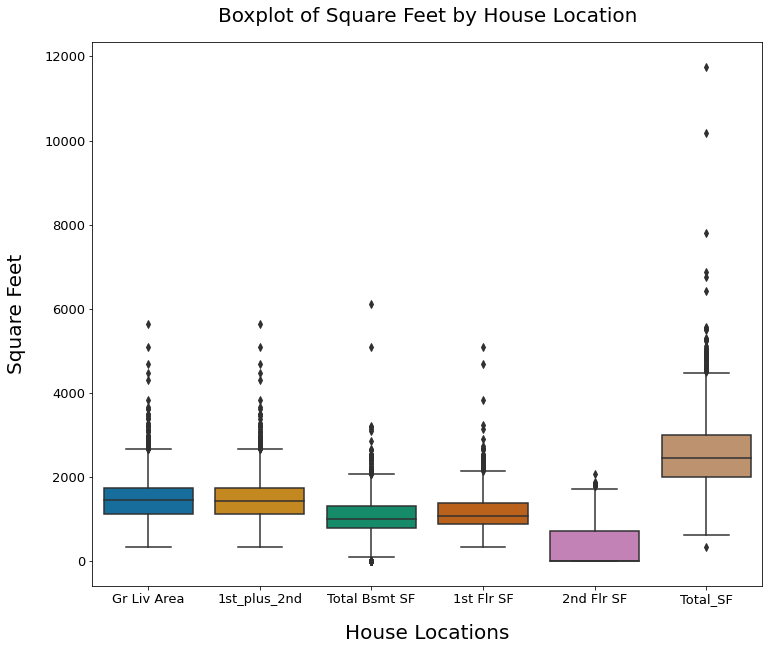

In [5]:
# use seaborn library to create boxplot.
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)

column=['Gr Liv Area', '1st_plus_2nd', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Total_SF']
ax = sns.boxplot(data=df2[column], palette='colorblind')

plt.title('Boxplot of Square Feet by House Location', fontsize=20, pad=20)
plt.xlabel('House Locations', fontsize=20, labelpad = 18) 
plt.ylabel('Square Feet', fontsize=20, labelpad = 18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

## House Square Feet Decision Time

The graph above confirms the sum of 1st and 2nd floor square footage is equal to 'Gr Liv Area' square feet. So I will remove columns 'Gr Liv Area' and '1st_plus_2nd'.

Rather than analyzing square feet by each floor separately, I feel it would be most appropriate to analyze total square feet since there are houses with no second floor (i.e. 'Ranch-Type' or 'Bungalow') and some with no basement. So, I will eliminate the columns of square feet by floor.

In [6]:
df2 = df2.drop(['Gr Liv Area', '1st_plus_2nd', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis = 1)

numerical_df2 = df2.select_dtypes(include=['float64', 'int64'])
print(numerical_df2.info(), '\n')

numerical_df2.isna().sum().sum()

null_series = numerical_df2.isnull().sum()
print(null_series)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   Lot Area         2930 non-null   int64  
 3   Overall Qual     2930 non-null   int64  
 4   Overall Cond     2930 non-null   int64  
 5   Low Qual Fin SF  2930 non-null   int64  
 6   Full Bath        2930 non-null   int64  
 7   Half Bath        2930 non-null   int64  
 8   Bedroom AbvGr    2930 non-null   int64  
 9   Kitchen AbvGr    2930 non-null   int64  
 10  TotRms AbvGrd    2930 non-null   int64  
 11  Fireplaces       2930 non-null   int64  
 12  Wood Deck SF     2930 non-null   int64  
 13  Open Porch SF    2930 non-null   int64  
 14  Enclosed Porch   2930 non-null   int64  
 15  3Ssn Porch       2930 non-null   int64  
 16  Screen Porch     2930 non-null   int64  
 17  Pool Area     

## Compute Pairwise Correlation

In [7]:
# compute the pairwise correlation coefficients between all of the columns in train_subset
df2_subset = df2[null_series.index]
corr_df = df2_subset.corr(method ='pearson')
Sale_Price_Corr = abs(corr_df['SalePrice'])

sorted_corrs = Sale_Price_Corr.sort_values(ascending=True)
print(sorted_corrs)

BsmtFin SF 2       0.005890
Order              0.031408
3Ssn Porch         0.032225
Bsmt Half Bath     0.035815
Low Qual Fin SF    0.037660
Pool Area          0.068403
MS SubClass        0.085092
Overall Cond       0.101697
Screen Porch       0.112151
Kitchen AbvGr      0.119814
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182805
yrs_until_remod    0.240168
Lot Area           0.266549
Bsmt Full Bath     0.275894
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
BsmtFin SF 1       0.432794
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.505784
Full Bath          0.545604
Garage Area        0.640385
Garage Cars        0.647861
Total_SF           0.793054
Overall Qual       0.799262
SalePrice          1.000000
Name: SalePrice, dtype: float64


## Check for Collinearity

The candidate features listed above are sorted by how strongly they're correlated with the 'SalePrice' column. I will keep only the features that have a correlation of 0.3 or higher. This cutoff is a bit arbitrary, however I will start with that.

The next thing I will look for is potential collinearity between some of these feature columns. Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

Generate a correlation matrix heatmap using Seaborn to visually compare the correlations and look for problematic pairwise feature correlations is an effective way to pick out potential cases of collinearity. Looking for outlier values in the heatmap makes this visual representation easier than just looking at the table of pairwise comparisons.

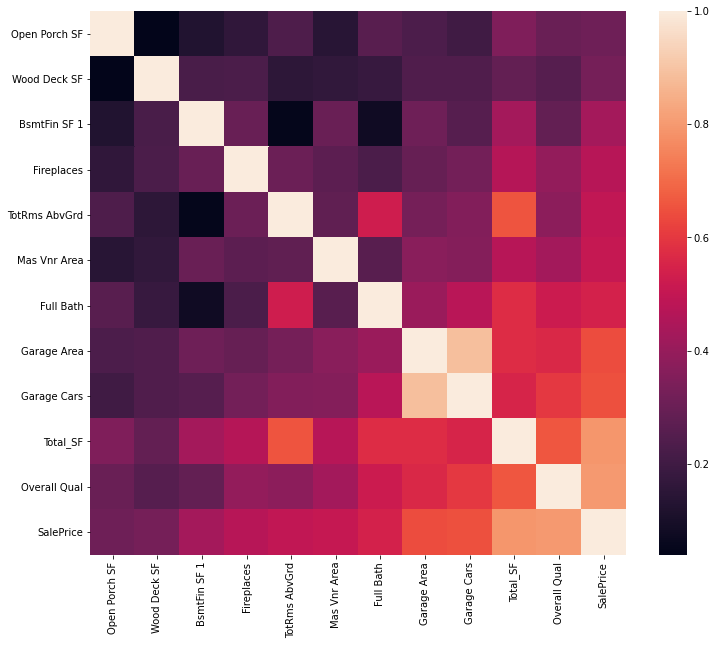

In [8]:
# plot seaborn heatmap.
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
strong_corrs = sorted_corrs[sorted_corrs > 0.3]

corrmat = df2_subset[strong_corrs.index]
corr2_df = corrmat.corr(method ='pearson')

ax = sns.heatmap(corr2_df)

## Observations and Action

The diagonal of white squares reflect the correlations of the variables with themselves (i.e. perfect correlation of 1.0)

Based on the correlation matrix heatmap (i.e. color shade comparisons), we can tell that the following pair of columns are strongly correlated:

- Garage Area and Garage Cars

If we read the descriptions of these two columns from the data documentation, we can tell that each of the columns reflects very similar information. I'll remove 'Garage Cars'.


## (Almost) Final Numerical House Features

Establish the final numerical house features to test predictability of house sale price.

In [9]:
final_corr_cols = strong_corrs.drop(['Garage Cars'])
print(final_corr_cols, '\n')
features = final_corr_cols.drop(['SalePrice']).index
display(Markdown('<h3><span style="color:blue"> Ten Numerical House Features  </span></h3>'))
print(features, '\n')

Open Porch SF    0.312951
Wood Deck SF     0.327143
BsmtFin SF 1     0.432794
Fireplaces       0.474558
TotRms AbvGrd    0.495474
Mas Vnr Area     0.505784
Full Bath        0.545604
Garage Area      0.640385
Total_SF         0.793054
Overall Qual     0.799262
SalePrice        1.000000
Name: SalePrice, dtype: float64 



<h3><span style="color:blue"> Ten Numerical House Features  </span></h3>

Index(['Open Porch SF', 'Wood Deck SF', 'BsmtFin SF 1', 'Fireplaces',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Full Bath', 'Garage Area', 'Total_SF',
       'Overall Qual'],
      dtype='object') 



## Create Train and Test Samples

Now I'm ready to split the 'cleaned' numerical data into 'Train' and 'Test' groups. I will split the data equally (50%) between the two.

There seems to be arguments both ways to either split the full data set into train and test without shuffling randomly or to include random shuffling. I have chosen to include randomizing.

In [10]:
# split dataframe file in half into 'Train' and 'Test' dataframes.
# include randomize shuffling to prevent confounding of results.
train=df2.sample(frac=0.5,random_state=1) #random state is a seed value
test=df2.drop(train.index)

# confirm equal split of data.
print(len(train), len(test), '\n')

target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()

# use sklearn linear model to calculate magnitude of errors (MSE & RMSE).
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('Train Data Root Mean Square Error =', '{:.0f}'.format(train_rmse), '\n')
print('Test Data Root Mean Square Error =', '{:.0f}'.format(test_rmse))


1465 1465 

Train Data Root Mean Square Error = 37231 

Test Data Root Mean Square Error = 34335


## Observations and Next Step

**RMSE**
- Root mean square error (RMSE) is a method of measuring the difference between values predicted by a model and their actual values. It is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. In other words, it tells you how concentrated the data is around the line of best fit. Lower values of RMSE indicate better fit.

**So what do the two Root Mean Square Error values above, one from 'Train' data and the other from 'Test' data tell us?** Well, the value for 'Test' data is lower than the value from 'Train' which I suppose is good (i.e. lower error). But, does it tell us anything about how well the 10 features included in the Multiple Regression model fit as a predictor model for housing sale price? **<span style="color:red">As a numerical individual value, I really don't think so.</span>**

**R-Squared**
- I prefer to know the calculated R-Squared or (Adjusted R-Squared) value which we can obtain with other Python library modules (e.g. statsmodels). R-Squared tells me the estimated total explained variability on the dependent variable offered by the independent variables in the model.
- For example, suppose the calculated R-Squared value in this project was 30%. Is that good? Well, it tells me that the variables I chose in the model only explains 30% of the total variability of house sale price. This means that variables **not included** in the model account for the other 70% **<span style="color:red">unexplained variability</span>**. So, no; that is not a good result.
- On the other hand, if R-Squared turned out to be say, 80%, I would say that is a good start. That leaves 20% unexplained variability.  The importance of the predictor equation would have an impact on how far I would want to go in terms of finding the key independent variables that would at least generate an R-Squared or (Adjusted R-Squared) value of, 80%, 85%, 90% ...

In Multiple Linear Regression, adjusted R-Squared (corrected for sample size and regression coefficients) is more appropriate than R-Squared as an increasing number of X variables also increases R-Squared. Adjusted R-Squared is always lower than the R-Squared.

**Adjusted-R²**
- The concept behind Adjusted-R² is simple. To get Adjusted-R², we penalize R² each time a new regression variable is added.
Specifically, we scale (1-R²) by a factor that is directly proportional to the number of regression variables. Greater is the number of regression variables in the model, greater is this scaling factor and greater is the downward adjustment to R².

In [11]:
# create column groups from 1 variable to 10 and compare
# calculated R-Squared values for each.
col1 = ['Overall Qual']
col2 = ['Overall Qual', 'Total_SF']
col3 = ['Overall Qual', 'Total_SF', 'Garage Area']
col4 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath']
col5 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area']
col6 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'TotRms AbvGrd']
col7 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces']
col8 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1']
col9 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1',\
         'Wood Deck SF']
col10 = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1',\
         'Wood Deck SF', 'Open Porch SF']
list = [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10]
j = 0
for n in list:
    X = test[n]
    Y = test['SalePrice']
 
    # with statsmodels
    X = sm.add_constant(X) # adding a constant
    j = j + 1 
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    display(Markdown('<h3><span style="color:blue"> {} Features  </span></h3>'.format(j)))
    print(n, '\n')
    rsquared = model.rsquared
    print('R-Squared Value =', "{:.2f}%".format(rsquared*100))

<h3><span style="color:blue"> 1 Features  </span></h3>

['Overall Qual'] 

R-Squared Value = 64.03%


<h3><span style="color:blue"> 2 Features  </span></h3>

['Overall Qual', 'Total_SF'] 

R-Squared Value = 76.90%


<h3><span style="color:blue"> 3 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area'] 

R-Squared Value = 78.40%


<h3><span style="color:blue"> 4 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath'] 

R-Squared Value = 78.41%


<h3><span style="color:blue"> 5 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area'] 

R-Squared Value = 79.06%


<h3><span style="color:blue"> 6 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd'] 

R-Squared Value = 79.07%


<h3><span style="color:blue"> 7 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces'] 

R-Squared Value = 79.84%


<h3><span style="color:blue"> 8 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1'] 

R-Squared Value = 80.76%


<h3><span style="color:blue"> 9 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Wood Deck SF'] 

R-Squared Value = 80.93%


<h3><span style="color:blue"> 10 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Wood Deck SF', 'Open Porch SF'] 

R-Squared Value = 80.94%


## R-Squared Results

Of the 10 features included in the model, the following three seem to have little additional impact on total explained variability: 'TotRms AbvGrd', 'Wood Deck SF', 'Open Porch SF'.

I will rerun the Multiple Regression Analysis after removing these three variables.

In [12]:
# limiting the independent variables to seven.
col = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1']
X = test[col]
Y = test['SalePrice']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
display(Markdown('<h3><span style="color:blue"> {} Features  </span></h3>'.format(7)))
print(col, '\n')

print_model = model.summary()
print(print_model)

Intercept: 
 -84039.20489769935
Coefficients: 
 [2.20689106e+04 2.99955690e+01 5.00006747e+01 7.77247138e+03
 3.30347939e+01 1.03369485e+04 1.88517499e+01]


<h3><span style="color:blue"> 7 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     871.3
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -17379.
No. Observations:                1465   AIC:                         3.477e+04
Df Residuals:                    1457   BIC:                         3.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## Results with 7 Features

Finding 7 features out of the original 29 numerical columns that yield an adjusted R-Squared value of 80.6% I would say is very good for a start.

I would like to investigate 'Sale Condition' as a variable and determine what to do with it.

## Types of Sale Conditions



In [13]:
# determine how many unique 'values' there are for 'Sale Conditions'.
print(df2['Sale Condition'].value_counts(dropna=False))

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64


## Investigate Sale Conditions

I see in the output above that there are 6 types of 'Sale Condition' categories. Let's generate a box plot and compare house sale price for each Sale Condition category.

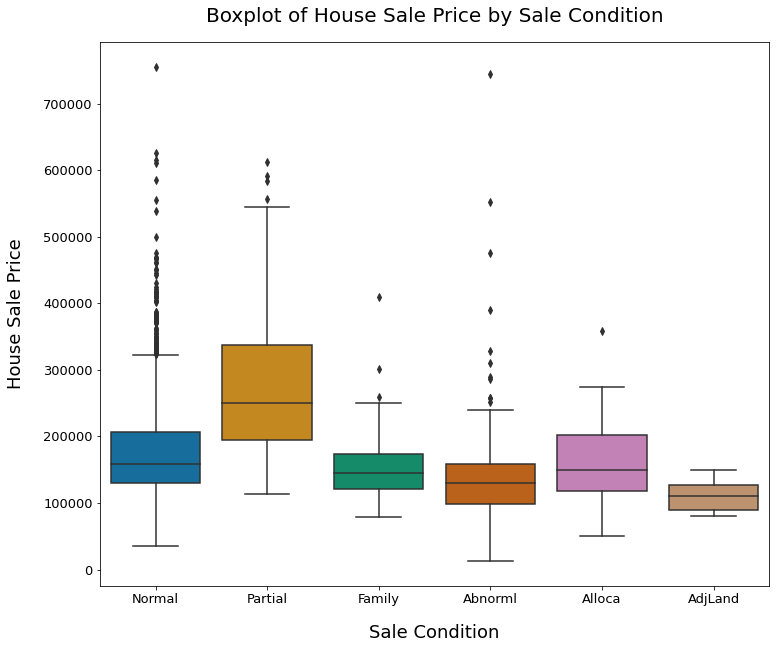

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)

sns.boxplot(y=df2['SalePrice'], x=df2['Sale Condition'], 
                 data=df2, 
                 palette='colorblind')

plt.title('Boxplot of House Sale Price by Sale Condition', fontsize=20, pad=20)
plt.xlabel('Sale Condition', fontsize=18, labelpad = 18) 
plt.ylabel('House Sale Price', fontsize=18, labelpad = 18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

## Numerical Data within Sale Condition = Normal

The Sale Condition classed as 'Normal' represents just over 82% of all houses in this data file. **Including the other five types of 'Sale Condition' categories shown above may 'muddy' the water regarding house sale price predictability.** There may be significant differences in their respective means.

Let's see if we confine the data to Sale Condition = 'Normal' **only** if the overall model predictability increases (i.e. R-Squared).

In [15]:
# filter 'Sale Condition' to one category = 'Normal'.
df2_normal = df2[df2['Sale Condition'] == 'Normal']
print(df2_normal['Sale Condition'].value_counts())

# split dataframe file in half into 'Train' and 'Test' dataframes.
# include randomize shuffling to prevent confounding of results.
train=df2_normal.sample(frac=0.5,random_state=1) #random state is a seed value
test=df2_normal.drop(train.index)
print(len(train), len(test), '\n')

col = ['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath',\
         'Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1']
X = test[col]
Y = test['SalePrice']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
display(Markdown('<h3><span style="color:blue"> {} Features  </span></h3>'.format(7)))
print(col, '\n')

print_model = model.summary()
print(print_model)

Normal    2413
Name: Sale Condition, dtype: int64
1206 1207 

Intercept: 
 -80393.62619124033
Coefficients: 
 [18838.59607641    39.75151283    42.1614011   3792.99175005
    39.89610188  7595.27313596    23.99813149]


<h3><span style="color:blue"> 7 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Full Bath', 'Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     954.4
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -14065.
No. Observations:                1207   AIC:                         2.815e+04
Df Residuals:                    1199   BIC:                         2.819e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## Sale Condition = 'Normal' Result

We see that by creating a predictor model within Sale Condition = 'Normal, the adjusted R-Squared value increased from 80.6% to 84.7%

Whether someone would want to limit a house sale price predictor model to only 'Normal' sale condition or across all 6 categories would depend on how critical it would be to maximize adjusted R-Squared value.

## One More Change to Consider

Looking at the output table of coefficients above, I see that coefficient 'Full Bath' has a P>|t| value of 0.049.

This indicates a somewhat 'weak' variable in the equation relative to the others. I will take it out of the equation and see if Adjusted R-Squared lowers.

In [16]:
# omit category 'Full Bath' from equation.
col = ['Overall Qual', 'Total_SF', 'Garage Area', \
         'Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1']
X = test[col] # here we have 10 variables for multiple regression.
Y = test['SalePrice']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
display(Markdown('<h3><span style="color:blue"> {} Features  </span></h3>'.format(6)))
print(col, '\n')

print_model = model.summary()
print(print_model)

Intercept: 
 -79844.43133164069
Coefficients: 
 [19114.77818564    41.32715704    42.72905189    39.54209009
  7479.86412996    23.02168246]


<h3><span style="color:blue"> 6 Features  </span></h3>

['Overall Qual', 'Total_SF', 'Garage Area', 'Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1'] 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1110.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -14067.
No. Observations:                1207   AIC:                         2.815e+04
Df Residuals:                    1200   BIC:                         2.818e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

## Result within 'Normal' Sale Condition and 6 Features

The adjusted R-Squared value remained the same: 84.7%. This I would say is quite good with only 6 house features used.

## Linear Regression with Category Type Data

Let's see if we can glean some category type columns from the data set and yield reasonable predictions of house sale price.

In [17]:
# extract non numeric columns from original data set.
text_df2 = df2.select_dtypes(include=['object'])

text_df3 = pd.DataFrame()
print(text_df2.info(), '\n')

# remove 'object' based columns with less than 5 unique values.
# will most likely not be significant in predictor model.
for n in text_df2:
    print(n, '    Unique Values Count =    ', text_df2[n].nunique())
    new = text_df2[n].nunique()
    if new > 4:
        text_df3 = pd.concat([text_df3,text_df2[n]], axis=1)
    else:
        None
print('\n')    
print(text_df3.head(3), '\n')
print(text_df3.info(), '\n')

df_null_counts2 = text_df3.isnull().sum()
print(df_null_counts2, '\n')
fill_missing_values2 = df[df_null_counts2[df_null_counts2>0].index]

print(fill_missing_values2.isnull().sum(), '\n')

# determine qty. of each unique value.
# this will determine what to change the missing values
# to - the mode among the unique values in each category.
for n in fill_missing_values2:
    print(fill_missing_values2[n].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Lot Shape       2930 non-null   object
 3   Land Contour    2930 non-null   object
 4   Utilities       2930 non-null   object
 5   Lot Config      2930 non-null   object
 6   Land Slope      2930 non-null   object
 7   Neighborhood    2930 non-null   object
 8   Condition 1     2930 non-null   object
 9   Condition 2     2930 non-null   object
 10  Bldg Type       2930 non-null   object
 11  House Style     2930 non-null   object
 12  Roof Style      2930 non-null   object
 13  Roof Matl       2930 non-null   object
 14  Exterior 1st    2930 non-null   object
 15  Exterior 2nd    2930 non-null   object
 16  Mas Vnr Type    2907 non-null   object
 17  Exter Qual      2930 non-null   object
 18  Exter Co

## Missing Value Fill In Decisions

- TA = Typical/Average
- Gd = Good

- Mas Vnr Type - This is masonry veneer type and 60% is None. Therefore I will remove this column.
- Bsmt Qual - Split the 80 NaN values between TA and Gd.
- Bsmt Cond - 89% is TA, so allocate the missing values to TA.
- BsmtFin Type 1 - Split the 80 NaN values between GLQ and Unf.
- BsmtFin Type 2 - 85% is Unf, so allocate the missing values to Unf.
- Electrical - 92% is SBrkr, so allocate the missing values to SBrkr.
- Garage Type - Split the 157 NaN values between Attchd (70%) and Detchd (30%).
- Garage Qual - 89% is TA, so allocate the missing values to TA.
- Garage Cond - 91% is TA, so allocate the missing values to TA.

In [18]:
fill_missing_values2['Bsmt Qual'].replace('nan', np.nan, inplace=True)    
mask = fill_missing_values2['Bsmt Qual'].isna() 
ind = fill_missing_values2['Bsmt Qual'].loc[mask].sample(frac=0.5).index
fill_missing_values2.loc[ind, 'Bsmt Qual'] = 'TA'
fill_missing_values2['Bsmt Qual'] = fill_missing_values2['Bsmt Qual'].fillna('Gd')    
print(fill_missing_values2['Bsmt Qual']. value_counts(dropna=False)) 

fill_missing_values2['Bsmt Cond'] = fill_missing_values2['Bsmt Cond'].fillna('TA')
print(fill_missing_values2['Bsmt Cond']. value_counts(dropna=False))

fill_missing_values2['BsmtFin Type 1'].replace('nan', np.nan, inplace=True)    
mask = fill_missing_values2['BsmtFin Type 1'].isna() 
ind = fill_missing_values2['BsmtFin Type 1'].loc[mask].sample(frac=0.5).index
fill_missing_values2.loc[ind, 'BsmtFin Type 1'] = 'GLQ'
fill_missing_values2['BsmtFin Type 1'] = fill_missing_values2['BsmtFin Type 1'].fillna('Unf')   
print(fill_missing_values2['BsmtFin Type 1']. value_counts(dropna=False))

fill_missing_values2['BsmtFin Type 2'] = fill_missing_values2['BsmtFin Type 2'].fillna('Unf')
print(fill_missing_values2['BsmtFin Type 2']. value_counts(dropna=False))

fill_missing_values2['Electrical'] = fill_missing_values2['Electrical'].fillna('SBrkr')
print(fill_missing_values2['Electrical']. value_counts(dropna=False))

fill_missing_values2['Garage Type'].replace('nan', np.nan, inplace=True)    
mask = fill_missing_values2['Garage Type'].isna() 
ind = fill_missing_values2['Garage Type'].loc[mask].sample(frac=0.7).index
fill_missing_values2.loc[ind, 'Garage Type'] = 'Attchd'
fill_missing_values2['Garage Type'] = fill_missing_values2['Garage Type'].fillna('Detchd')    
print(fill_missing_values2['Garage Type']. value_counts(dropna=False))

fill_missing_values2['Garage Qual'] = fill_missing_values2['Garage Qual'].fillna('TA')
print(fill_missing_values2['Garage Qual']. value_counts(dropna=False))

fill_missing_values2['Garage Cond'] = fill_missing_values2['Garage Cond'].fillna('TA')
print(fill_missing_values2['Garage Cond']. value_counts(dropna=False))
print(fill_missing_values2.isnull().sum())

TA    1323
Gd    1259
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64
TA    2696
Gd     122
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
GLQ    899
Unf    891
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64
Unf    2580
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64
SBrkr    2683
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
Attchd     1841
Detchd      829
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64
TA    2774
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64
TA    2824
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64
Mas Vnr Type      23
Bsmt Qual          0
Bsmt Cond          0
BsmtFin Type 1     0
BsmtFin Type 2     0
Electrical         0
Garage Type        0
Garage Qual        0
Garage Cond        0
dtype: int64


## Create Categorical Dataframe with No Missing Values



In [19]:
# replace columns with missing values with
# modified ones having no missing values.
df_cat_temp = text_df3.drop(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', \
                   'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', \
                   'Garage Type', 'Garage Qual', 'Garage Cond',\
                  ], axis = 1)

text_df3 = pd.concat([df_cat_temp, fill_missing_values2], axis=1)
text_df3 = text_df3.drop(['Mas Vnr Type'], axis = 1)

print(text_df3.info())
# confirm no missing values.
print(text_df3.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 0 to 2929
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Lot Config      2930 non-null   object
 2   Neighborhood    2930 non-null   object
 3   Condition 1     2930 non-null   object
 4   Condition 2     2930 non-null   object
 5   Bldg Type       2930 non-null   object
 6   House Style     2930 non-null   object
 7   Roof Style      2930 non-null   object
 8   Roof Matl       2930 non-null   object
 9   Exterior 1st    2930 non-null   object
 10  Exterior 2nd    2930 non-null   object
 11  Exter Cond      2930 non-null   object
 12  Foundation      2930 non-null   object
 13  Heating         2930 non-null   object
 14  Heating QC      2930 non-null   object
 15  Kitchen Qual    2930 non-null   object
 16  Functional      2930 non-null   object
 17  Sale Type       2930 non-null   object
 18  Sale Conditio

## Linear Regression for Categorical Variables

In [20]:
X = text_df3
Y = df2['SalePrice']

# create 'dummy' columns in order to be able to
# perform linear regression analysis on categorical data.
X = pd.get_dummies(data=X, drop_first=True)
print('There are', len(X.columns), 'dummy columns created.', '\n')
print(len(X))
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .50, random_state = 40)

model = sm.OLS(Y_test, X_test).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

There are 184 dummy columns created. 

2930
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     34.27
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:38   Log-Likelihood:                -17282.
No. Observations:                1465   AIC:                         3.491e+04
Df Residuals:                    1290   BIC:                         3.584e+04
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## Initial Adjusted R-Squared Result for Categorical Variables

I would say an initial adjusted R-Squared value of 79.8% for categorical type data is quite good.

However, there were many dummy columns: 184. I looked over the P>|t| values in the output table above and decided to remove dummy columns that had 'weak' values greater than 0.050.

In [21]:
text_df4 = text_df3.drop(['Condition 1', 'Condition 2', 'Lot Config',\
                          'House Style', 'Roof Style', 'Exterior 2nd',\
                          'Exter Cond', 'Functional', 'Electrical',\
                          'Foundation', 'Garage Type', 'Sale Type',\
                          'Sale Condition', 'BsmtFin Type 2','Bsmt Cond'\
                         ], axis = 1)
print(len(text_df4))
print(text_df4.columns)

Y = df2['SalePrice']

X = pd.get_dummies(data=text_df4, drop_first=True)
print('There are', len(X.columns), 'dummy columns created.', '\n')

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .50, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)


model = sm.OLS(Y_test, X_test).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

2930
Index(['MS Zoning', 'Neighborhood', 'Bldg Type', 'Roof Matl', 'Exterior 1st',
       'Heating', 'Heating QC', 'Kitchen Qual', 'Bsmt Qual', 'BsmtFin Type 1',
       'Garage Qual', 'Garage Cond'],
      dtype='object')
There are 89 dummy columns created. 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     59.37
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:38   Log-Likelihood:                -17434.
No. Observations:                1465   AIC:                         3.504e+04
Df Residuals:                    1381   BIC:                         3.548e+04
Df Model:                          83                                         
Covariance Type:            n

## Second Adjusted R-Squared Result for Categorical Variables

Reducing the number of dummy columns from 184 to 89, reduced the adjusted R-squared from 79.9% to 76.9%.

I would consider this not too big of a loss in return for substantially reducing the number of dummy columns.

## Categorical Data Within Sale Condition = Normal

In [22]:
# filter categorical data to only within Sale Condition = 'Normal'.
text_df3['SalePrice'] = df2['SalePrice']
text_df3_normal = text_df3[text_df3['Sale Condition'] == 'Normal']
print(text_df3_normal['Sale Condition'].value_counts(dropna=False))

text_df4_normal = text_df3_normal.drop(['Condition 1', 'Condition 2', 'Lot Config',\
                          'House Style', 'Roof Style', 'Exterior 2nd',\
                          'Exter Cond', 'Functional', 'Electrical',\
                          'Foundation', 'Garage Type', 'Sale Type',\
                          'Sale Condition', 'BsmtFin Type 2','Bsmt Cond'\
                         ], axis = 1)

print(len(text_df4_normal))

text_df5_normal = text_df4_normal.drop(['SalePrice'], axis=1)
print(text_df5_normal.columns)
Y = text_df4_normal['SalePrice']

X2 = pd.get_dummies(data=text_df5_normal, drop_first=True)
print('There are', len(X2.columns), 'dummy columns created.', '\n')

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = .50, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X2_train, Y_train)
predicted = regr.predict(X2_test)


model = sm.OLS(Y_test, X2_test).fit()
predictions = model.predict(X2)

print_model = model.summary()
print(print_model)

Normal    2413
Name: Sale Condition, dtype: int64
2413
Index(['MS Zoning', 'Neighborhood', 'Bldg Type', 'Roof Matl', 'Exterior 1st',
       'Heating', 'Heating QC', 'Kitchen Qual', 'Bsmt Qual', 'BsmtFin Type 1',
       'Garage Qual', 'Garage Cond'],
      dtype='object')
There are 87 dummy columns created. 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     43.14
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          1.31e-283
Time:                        17:47:38   Log-Likelihood:                -14354.
No. Observations:                1207   AIC:                         2.887e+04
Df Residuals:                    1128   BIC:                         2.927e+04
Df Model:                          78                     

## Result within 'Normal' Sale Condition for Categorical Data

It's interesting that there was a slight reduction in Adjusted R-Squared value (76.9% to 73.2%) for categorical data whereas for numerical data there was an increase.

I don't have an explanation for that.

## Combine Numerical and Categorical Data

In [23]:
df2_numerical = df2[features]

df_combined = pd.concat([df2_numerical, X], axis=1)
print('There are', len(df_combined.columns), 'numerical and dummy columns created.', '\n')

X = df_combined
Y = df2['SalePrice']

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .50, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)


model = sm.OLS(Y_test, X_test).fit()
predictions = model.predict(X)
R2 = model.rsquared
print_model = model.summary()
print(R2)
print(print_model)


There are 99 numerical and dummy columns created. 

0.9090101856260804
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:38   Log-Likelihood:                -16791.
No. Observations:                1465   AIC:                         3.377e+04
Df Residuals:                    1371   BIC:                         3.427e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## Result for Combined Numerical and Categorical Data

**Wow! A nice increase in Adjusted R-Squared value to 90.3% for the combined data types!**

## Combine Numerical and Categorical Data within Sale Condition 'Normal'

In [24]:
df2_numerical2 = df2_normal[features]

df_combined = pd.concat([df2_numerical2, X2], axis=1)
print('There are', len(df_combined.columns), 'numerical and dummy columns created.', '\n')

X = df_combined
Y = text_df4_normal['SalePrice']

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .50, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)


model = sm.OLS(Y_test, X_test).fit()
predictions = model.predict(X)
R2 = model.rsquared
print_model = model.summary()
print(R2)
print(print_model)


There are 97 numerical and dummy columns created. 

0.9166807261128831
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:47:38   Log-Likelihood:                -13689.
No. Observations:                1207   AIC:                         2.756e+04
Df Residuals:                    1118   BIC:                         2.801e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## Result for Combined Numerical and Categorical Data within Sale Condition 'Normal'

So, we've reached a maximum Adjusted R-Squared value of 91.0% It looks to be a good sign that for all combined data types regarding the chosen independent variables, there wasn't much difference in total explained variability whether predicting across all Sale Condition types or just within 'Normal' type.

That's enough analysis for now. Don't want to over analyze and create pseudo results.

## What is Data Leakage in Machine Learning?

Data leakage can cause you to create overly optimistic if not completely invalid predictive models.

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

**How could data leakage pose a problem?**
- _"The reality is that as a data scientist, you’re at risk of producing a data leakage situation any time you prepare, clean your data, impute missing values, remove outliers, etc. You might be distorting the data in the process of preparing it to the point that you’ll build a model that works well on your “clean” dataset, but will totally suck when applied in the real-world situation where you actually want to apply it."_

Was there any data leakage in this project analysis? I can't say for sure as I tried to prevent it.

## Create Summary Table of R-Squared Values

In [25]:
pd.set_option('display.max_colwidth', 90)
tab = pd.read_csv('R Squared.csv')
display(tab)
pd.reset_option('display.max_colwidth')

,Num,Data Description,Features,Dummy Columns,R-Squared,Adjusted R-Squared
0,1,Numerical Data,7,0,80.70%,80.60%
1,2,Numerical Data within Sale Condition 'Normal',6,0,84.70%,84.70%
2,3,Categorical Data with 28 Features/184 Dummy Columns,28,184,82.20%,79.80%
3,4,Categorical Data with 12 Features/89 Dummy Columns,12,89,78.10%,76.80%
4,5,Categorical Data within Sale Condition 'Normal',12,87,74.90%,73.20%
5,6,Numerical + Categorical Data Combined (1 + 3 above),19,89,90.90%,90.30%
6,7,Numerical + Categorical Data Combined (2 + 4 above),19,89,91.70%,91.00%


## Conclusions

We see in the table above that the Adjusted R-Squared value when limiting the variables to only numerical category within Sale Condition 'Normal' _(Num 2)_ was quite good at 84.7%. However, it was worth peforming additional analysis by including categorical data.

**The best result for total explained variability (Adjusted R-Squared) occurred with Numerical + Categorical Data Combined _(Num 7)_ at <span style="color:blue">91.0%</span>.** I would say that is very good!!

<h3>This is a long report and if you completely read through it, accolades to you and thank you!!<h3>